In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
the_number_of_segment = 100

In [3]:
vessel_name = 'OOCL_LUXEMBRUG'

# 전항지 출항 확인

전항지 출항 지점 확인

In [4]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [5]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [6]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'{vessel_name}_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# OOCL_LUXEMBOURG_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'OOCL_LUXEMBOURG_VRGO3_2022_6processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'OOCL_LUXEMBOURG_VRGO3_2022_6processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

# OOCL_LUXEMBOURG_voyages_list = [
#     'OOCL_LUXEMBOURG_VRGO3_2022_6processed', '{vessel_name}_9V7282_2022_8processed'
# ]
# OOCL_LUXEMBOURG_voyages_list = [
#     'OOCL_NEW_YORK_VRJS2_2022_1processed',
#     'OOCL_LUXEMBOURG_VRGO3_2022_6processed',
#     'OOCL_NEW_YORK_VRJS2_2022_3processed'
# ]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [7]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

In [8]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [9]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [10]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [11]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# Tianjin to Busan PNIT

## OOCL_LUXEMBOURG

In [12]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from shapely.geometry import LineString

In [15]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

In [16]:
interpolation_number = "1000"

### interpolation 1000

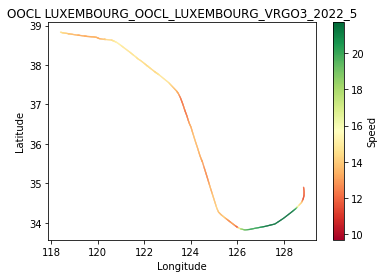

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.590996554570866
보간법 후 일반 속도 표준편차: 2.538435289179819
보간법 후 저속 제거 평균 속도 : 14.590996554570866
보간법 후 저속 제거 속도 표준편차: 2.538435289179819


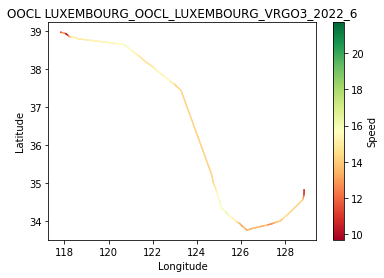

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.389369821327275
보간법 후 일반 속도 표준편차: 1.0662556866445383
보간법 후 저속 제거 평균 속도 : 14.389369821327275
보간법 후 저속 제거 속도 표준편차: 1.0662556866445383


In [17]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [18]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [19]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [20]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [21]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [22]:
interpolation_number = "2000"

### interpolation 2000

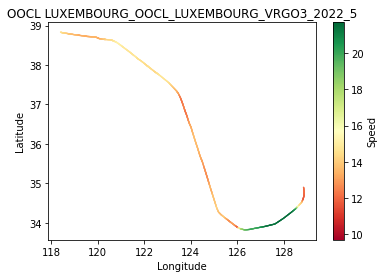

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.591558254881038
보간법 후 일반 속도 표준편차: 2.5380682405605453
보간법 후 저속 제거 평균 속도 : 14.591558254881038
보간법 후 저속 제거 속도 표준편차: 2.5380682405605453


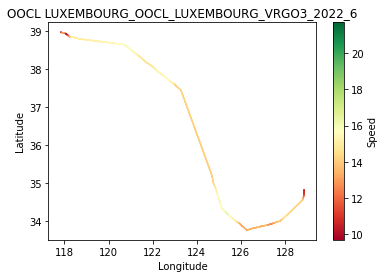

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.391327968837398
보간법 후 일반 속도 표준편차: 1.0623290753930967
보간법 후 저속 제거 평균 속도 : 14.391327968837398
보간법 후 저속 제거 속도 표준편차: 1.0623290753930967


In [23]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [24]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [25]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [26]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [27]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [28]:
interpolation_number = "2500"

### interpolation 2500

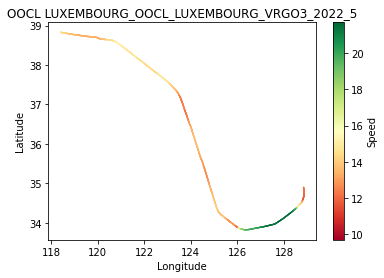

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.591697978302918
보간법 후 일반 속도 표준편차: 2.5380012204812776
보간법 후 저속 제거 평균 속도 : 14.591697978302918
보간법 후 저속 제거 속도 표준편차: 2.5380012204812776


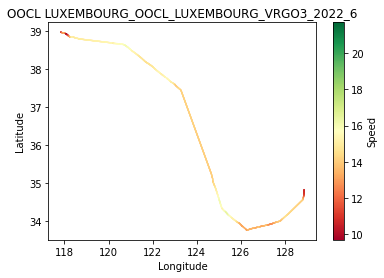

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.391712866376848
보간법 후 일반 속도 표준편차: 1.0614818554810386
보간법 후 저속 제거 평균 속도 : 14.391712866376848
보간법 후 저속 제거 속도 표준편차: 1.0614818554810386


In [29]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [30]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [31]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [32]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [33]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [34]:
interpolation_number = "3000"

### interpolation 3000

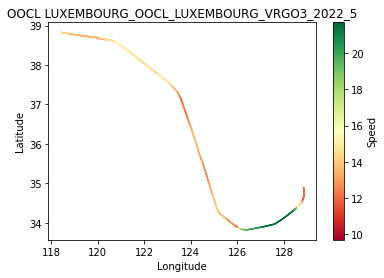

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.591782307539136
보간법 후 일반 속도 표준편차: 2.5379660857009925
보간법 후 저속 제거 평균 속도 : 14.591782307539136
보간법 후 저속 제거 속도 표준편차: 2.5379660857009925


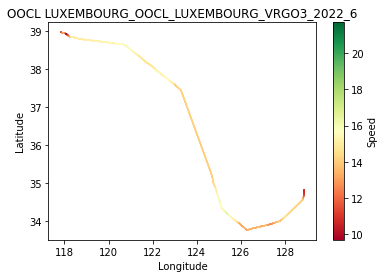

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.391990809286751
보간법 후 일반 속도 표준편차: 1.0610714848825102
보간법 후 저속 제거 평균 속도 : 14.391990809286751
보간법 후 저속 제거 속도 표준편차: 1.0610714848825102


In [35]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [36]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [37]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [38]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [39]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [40]:
interpolation_number = "4000"

### interpolation 4000

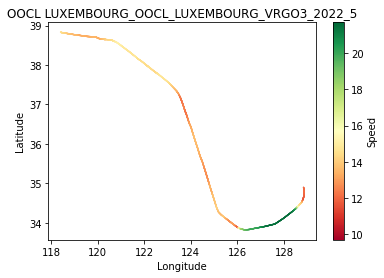

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.591883430147547
보간법 후 일반 속도 표준편차: 2.537913691448768
보간법 후 저속 제거 평균 속도 : 14.591883430147547
보간법 후 저속 제거 속도 표준편차: 2.537913691448768


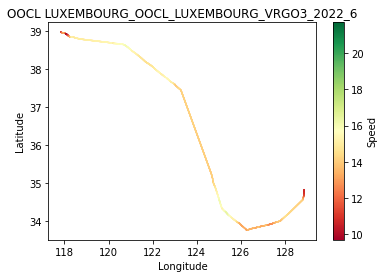

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.392309451615123
보간법 후 일반 속도 표준편차: 1.0604371784580724
보간법 후 저속 제거 평균 속도 : 14.392309451615123
보간법 후 저속 제거 속도 표준편차: 1.0604371784580724


In [41]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [42]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [43]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [44]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [45]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [46]:
interpolation_number = "5000"

### interpolation 5000

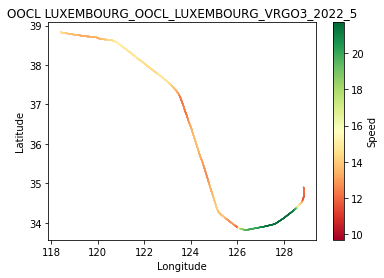

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.591945117753934
보간법 후 일반 속도 표준편차: 2.5378759639075534
보간법 후 저속 제거 평균 속도 : 14.591945117753934
보간법 후 저속 제거 속도 표준편차: 2.5378759639075534


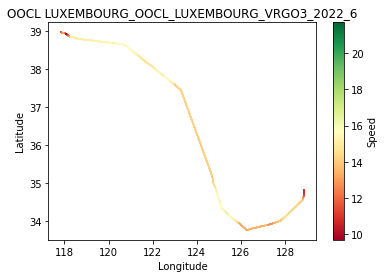

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.392502271663203
보간법 후 일반 속도 표준편차: 1.060073624206395
보간법 후 저속 제거 평균 속도 : 14.392502271663203
보간법 후 저속 제거 속도 표준편차: 1.060073624206395


In [47]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [48]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [49]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [50]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [51]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [52]:
interpolation_number = "7500"

### interpolation 7500

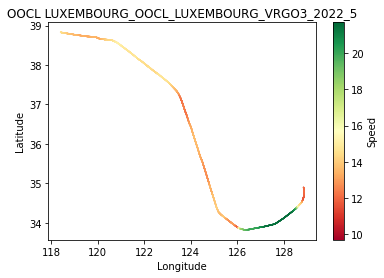

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.592026717426437
보간법 후 일반 속도 표준편차: 2.5378353133833738
보간법 후 저속 제거 평균 속도 : 14.592026717426437
보간법 후 저속 제거 속도 표준편차: 2.5378353133833738


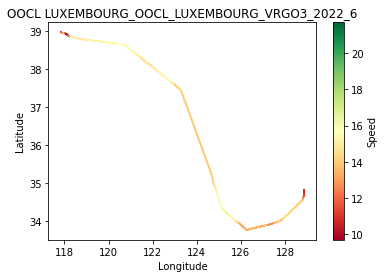

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.39276255484803
보간법 후 일반 속도 표준편차: 1.059585502930055
보간법 후 저속 제거 평균 속도 : 14.39276255484803
보간법 후 저속 제거 속도 표준편차: 1.059585502930055


In [53]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [54]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [55]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [56]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [57]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [58]:
interpolation_number = "9000"

### interpolation 9000

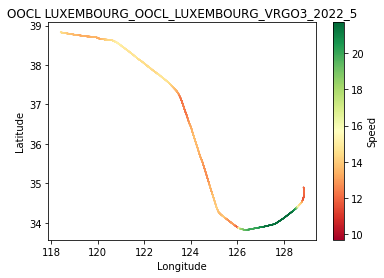

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.592053841364551
보간법 후 일반 속도 표준편차: 2.5378182956890853
보간법 후 저속 제거 평균 속도 : 14.592053841364551
보간법 후 저속 제거 속도 표준편차: 2.5378182956890853


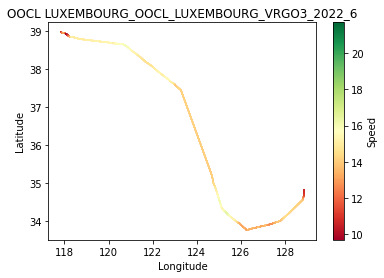

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.392850084851117
보간법 후 일반 속도 표준편차: 1.059428417753835
보간법 후 저속 제거 평균 속도 : 14.392850084851117
보간법 후 저속 제거 속도 표준편차: 1.059428417753835


In [59]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [60]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [61]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [62]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [63]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [64]:
interpolation_number = "10000"

### interpolation 10000

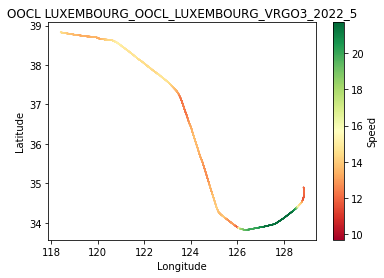

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.592068155948184
보간법 후 일반 속도 표준편차: 2.5378117114036414
보간법 후 저속 제거 평균 속도 : 14.592068155948184
보간법 후 저속 제거 속도 표준편차: 2.5378117114036414


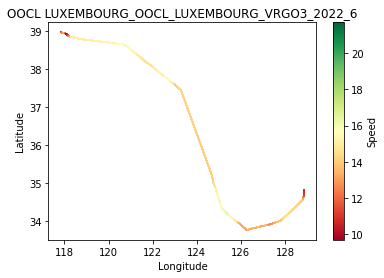

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.392892911536764
보간법 후 일반 속도 표준편차: 1.0593490724553334
보간법 후 저속 제거 평균 속도 : 14.392892911536764
보간법 후 저속 제거 속도 표준편차: 1.0593490724553334


In [65]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [66]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [67]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [68]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [69]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [70]:
interpolation_number = "11000"

### interpolation 11000

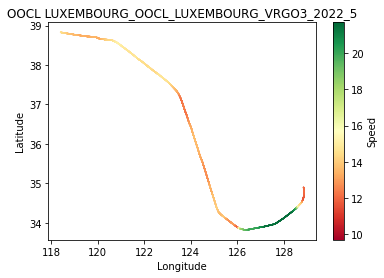

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.592079750537877
보간법 후 일반 속도 표준편차: 2.537805777495983
보간법 후 저속 제거 평균 속도 : 14.592079750537877
보간법 후 저속 제거 속도 표준편차: 2.537805777495983


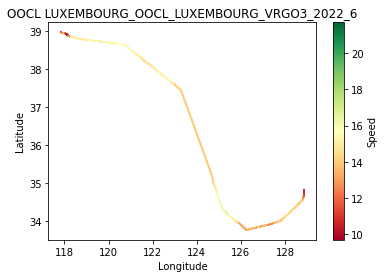

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.392928175346714
보간법 후 일반 속도 표준편차: 1.059282748639444
보간법 후 저속 제거 평균 속도 : 14.392928175346714
보간법 후 저속 제거 속도 표준편차: 1.059282748639444


In [71]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [72]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [73]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [74]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [75]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [76]:
interpolation_number = "12000"

### interpolation 12000

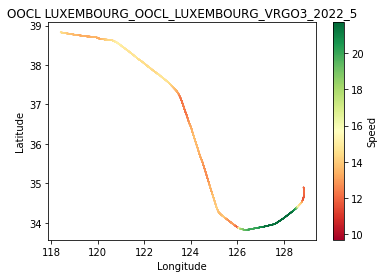

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.59208854884634
보간법 후 일반 속도 표준편차: 2.5377997354377935
보간법 후 저속 제거 평균 속도 : 14.59208854884634
보간법 후 저속 제거 속도 표준편차: 2.5377997354377935


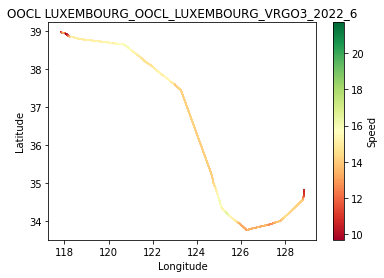

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.392957897752112
보간법 후 일반 속도 표준편차: 1.0592265758663348
보간법 후 저속 제거 평균 속도 : 14.392957897752112
보간법 후 저속 제거 속도 표준편차: 1.0592265758663348


In [77]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [78]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [79]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [80]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [81]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [82]:
# all_data = pd.concat(high_speed_path_data)

# # Add a new index column representing the row number
# all_data['index'] = range(len(all_data))
# all_data["index"] = all_data.index
# concaternated_df = all_data.groupby('index').mean()
# concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [83]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

# ETA 실험 (interpolation 1000), AKA BHUM 7항차 저속

In [84]:
interpolation_number = 1000

In [85]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666868e+09,118.125863,38.895183,12.686211
2,1.666868e+09,118.136326,38.893616,12.872422
3,1.666868e+09,118.146789,38.892049,13.058634
4,1.666868e+09,118.157253,38.890482,13.244845
...,...,...,...,...
995,1.667037e+09,128.861983,34.825336,11.397471
996,1.667038e+09,128.860884,34.835194,11.364014
997,1.667038e+09,128.859489,34.843829,11.359343
998,1.667038e+09,128.858095,34.852465,11.354671


In [86]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [87]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [88]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [89]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.19632003433498
13.437661436889261
12.21202016356894
13.266110294801745
14.322136671369293
14.288841787862788
14.221171188527023
14.20014780789621
14.18993354279217
14.244077618905953
14.314303118827041
14.350886341427758
14.316036620097284
14.472493238819862
14.702359857138125
14.841285985507422
14.976425620182829
15.282915979217407
15.450009892935153
15.475450639125691
15.3772909447557
15.19313233769536
15.015611742983177
14.92868288969829
14.862576646656668
14.67174413812738
14.563307272006801
14.585366221299324
14.628266460958883
14.796509961402716
14.90293101863223
14.83765053999069
14.902885336305895
15.089291475708674
15.057872749398703
14.820921160167723
14.349332359350361
14.175013748347032
13.975795725529697
13.7706103077706
13.51605559474759
13.255765489283695
13.224397196913847
13.31155349473561
13.340086153279717
13.215394061906647
13.292912750613795
13.430263219537846
13.602266123763323
13.706929108500384
13.764670269513854
13.874278328467602
13.916416597502636
13.88475

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [90]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [91]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [92]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:32:21.696543
평균: 0 days 03:06:13.190117547


In [93]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 20:57:22.924889,2022-11-25 21:46:07.464304,0 days 00:48:44.539415
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 20:56:40.528780,2022-11-25 21:46:07.464304,0 days 00:49:26.935524
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 20:52:50.608063,2022-11-25 21:46:07.464304,0 days 00:53:16.856241
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 20:52:20.263828,2022-11-25 21:46:07.464304,0 days 00:53:47.200476
205,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8717,34.0420,14.1,58.0,2022-11-25 16:33:35.227346,2022-11-25 07:29:10.000000,2022-11-25 02:29:49,under way using engine,134.834462,351.971500,2022-11-25 20:47:47.668784,2022-11-25 21:46:07.464304,0 days 00:58:19.795520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-11-25 16:54:08.747089,2022-11-25 21:46:07.464304,0 days 04:51:58.717215
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-25 16:44:02.902666,2022-11-25 21:46:07.464304,0 days 05:02:04.561638
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 16:33:57.304487,2022-11-25 21:46:07.464304,0 days 05:12:10.159817
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 16:28:54.789498,2022-11-25 21:46:07.464304,0 days 05:17:12.674806


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [94]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [95]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [96]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:32:21.696543
평균: 0 days 03:06:13.190117547


In [97]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 20:57:22.924889,2022-11-25 21:46:07.464304,0 days 00:48:44.539415
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 20:56:40.528780,2022-11-25 21:46:07.464304,0 days 00:49:26.935524
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 20:52:50.608063,2022-11-25 21:46:07.464304,0 days 00:53:16.856241
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 20:52:20.263828,2022-11-25 21:46:07.464304,0 days 00:53:47.200476
205,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8717,34.0420,14.1,58.0,2022-11-25 16:33:35.227346,2022-11-25 07:29:10.000000,2022-11-25 02:29:49,under way using engine,134.834462,351.971500,2022-11-25 20:47:47.668784,2022-11-25 21:46:07.464304,0 days 00:58:19.795520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-11-25 16:54:08.747089,2022-11-25 21:46:07.464304,0 days 04:51:58.717215
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-25 16:44:02.902666,2022-11-25 21:46:07.464304,0 days 05:02:04.561638
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 16:33:57.304487,2022-11-25 21:46:07.464304,0 days 05:12:10.159817
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 16:28:54.789498,2022-11-25 21:46:07.464304,0 days 05:17:12.674806


# ETA 실험 (interpolation 2000), AKA BHUM 7항차 저속

In [98]:
interpolation_number = 2000

In [99]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666868e+09,118.120629,38.895967,12.593059
2,1.666868e+09,118.125858,38.895184,12.686118
3,1.666868e+09,118.131087,38.894401,12.779177
4,1.666868e+09,118.136316,38.893617,12.872236
...,...,...,...,...
1995,1.667038e+09,128.859488,34.843838,11.359338
1996,1.667038e+09,128.858791,34.848153,11.357004
1997,1.667038e+09,128.858094,34.852469,11.354669
1998,1.667038e+09,128.857397,34.856784,11.352335


In [100]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [101]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [102]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [103]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.229682559663482
13.401834253840864
12.222875234839087
13.296521529760986
14.32757734314239
14.288617593262575
14.220022457504104
14.199703976993522
14.190250537926705
14.24552830025678
14.315435584797154
14.351009480791612
14.315470571214917
14.477851454477115
14.705291481638492
14.840743406489938
14.982428063088012
15.287497914444614
15.449379894733976
15.475569565232624
15.375561706766323
15.189069243587635
15.015028850366104
14.927859509728984
14.860413114300098
14.67017514918721
14.563151460693959
14.585091378214178
14.629942739976897
14.798175021251168
14.903420011758618
14.83672309021893
14.905228889358582
15.090484488590226
15.05622678084318
14.81941098958375
14.345972130844393
14.174592862557734
13.974097423966526
13.769861336188537
13.51426779475788
13.255232611113072
13.224757556032696
13.311834998924004
13.339703193470896
13.215394865110559
13.293161548651375
13.430470534524357
13.602383718171637
13.7068970766013
13.764647461442461
13.874202471352731
13.916400854827595
13

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [104]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [105]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [106]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:13:29.843402
평균: 0 days 01:57:03.925936805


In [107]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:09:38.721119,2022-11-25 21:46:07.464304,0 days 00:36:28.743185
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:07:30.905681,2022-11-25 21:46:07.464304,0 days 00:38:36.558623
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:06:29.213843,2022-11-25 21:46:07.464304,0 days 00:39:38.250461
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:04:36.060058,2022-11-25 21:46:07.464304,0 days 00:41:31.404246
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:04:03.085336,2022-11-25 21:46:07.464304,0 days 00:42:04.378968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-11-25 19:13:00.600230,2022-11-25 21:46:07.464304,0 days 02:33:06.864074
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-25 19:02:54.755807,2022-11-25 21:46:07.464304,0 days 02:43:12.708497
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 18:52:49.157628,2022-11-25 21:46:07.464304,0 days 02:53:18.306676
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 18:47:46.642639,2022-11-25 21:46:07.464304,0 days 02:58:20.821665


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [108]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [109]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [110]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:13:29.843402
평균: 0 days 01:57:03.925936805


In [111]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:09:38.721119,2022-11-25 21:46:07.464304,0 days 00:36:28.743185
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:07:30.905681,2022-11-25 21:46:07.464304,0 days 00:38:36.558623
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:06:29.213843,2022-11-25 21:46:07.464304,0 days 00:39:38.250461
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:04:36.060058,2022-11-25 21:46:07.464304,0 days 00:41:31.404246
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:04:03.085336,2022-11-25 21:46:07.464304,0 days 00:42:04.378968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-11-25 19:13:00.600230,2022-11-25 21:46:07.464304,0 days 02:33:06.864074
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-25 19:02:54.755807,2022-11-25 21:46:07.464304,0 days 02:43:12.708497
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 18:52:49.157628,2022-11-25 21:46:07.464304,0 days 02:53:18.306676
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 18:47:46.642639,2022-11-25 21:46:07.464304,0 days 02:58:20.821665


# ETA 실험 (interpolation 2500), AKA BHUM 7항차 저속

In [112]:
interpolation_number = 2500

In [113]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666868e+09,118.119583,38.896124,12.574440
2,1.666868e+09,118.123766,38.895497,12.648880
3,1.666868e+09,118.127948,38.894871,12.723319
4,1.666868e+09,118.132131,38.894244,12.797759
...,...,...,...,...
2495,1.667038e+09,128.858930,34.847292,11.357470
2496,1.667038e+09,128.858373,34.850744,11.355602
2497,1.667038e+09,128.857815,34.854196,11.353735
2498,1.667038e+09,128.857258,34.857648,11.351867


In [114]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [115]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [116]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [117]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.236809295480116
13.394173589031045
12.225645954916088
13.302461640295771
14.328678127685272
14.288517620640418
14.219789549048551
14.19962869103903
14.190313898900571
14.245818261483816
14.315663379879954
14.351034093882149
14.315475336220949
14.478959703539603
14.705877454602005
14.840665978335732
14.983409690202341
15.288384746793952
15.44931085572185
15.475742680534777
15.3751156808511
15.187669109379772
15.01476049530349
14.927728760465898
14.860041017012563
14.669646535917051
14.563226554490003
14.585029049750332
14.630255791142222
14.798500487585976
14.903520762810095
14.836449524005317
14.905702458545045
15.090615671643134
15.055998597007928
14.819110550126368
14.345162497353076
14.174470840894523
13.973963297013245
13.76971163178597
13.513910449378947
13.255152034490813
13.224806052104693
13.31189084917719
13.339627748638916
13.215427969849106
13.293201734305192
13.430520672299219
13.602407222934996
13.706904594662143
13.764666880046814
13.874187309036564
13.916404443816239


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [118]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [119]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [120]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:45:47.440360
평균: 0 days 01:43:30.866185771


In [121]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:12:05.553550,2022-11-25 21:46:07.464304,0 days 00:34:01.910754
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:09:40.670498,2022-11-25 21:46:07.464304,0 days 00:36:26.793806
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:09:12.961994,2022-11-25 21:46:07.464304,0 days 00:36:54.502310
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:07:02.892489,2022-11-25 21:46:07.464304,0 days 00:39:04.571815
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:07:00.459658,2022-11-25 21:46:07.464304,0 days 00:39:07.004646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:29:44.522998,2022-11-25 21:46:07.464304,0 days 02:16:22.941306
154,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8985,33.9475,14.1,108.0,2022-11-25 08:59:20.364647,2022-11-24 23:57:10,2022-11-24 11:41:47,under way using engine,290.907216,759.383376,2022-11-25 19:25:39.841460,2022-11-25 21:46:07.464304,0 days 02:20:27.622844
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 19:20:31.560670,2022-11-25 21:46:07.464304,0 days 02:25:35.903634
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 19:15:29.045681,2022-11-25 21:46:07.464304,0 days 02:30:38.418623


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [122]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [123]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [124]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:45:47.440360
평균: 0 days 01:43:30.866185771


In [125]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:12:05.553550,2022-11-25 21:46:07.464304,0 days 00:34:01.910754
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:09:40.670498,2022-11-25 21:46:07.464304,0 days 00:36:26.793806
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:09:12.961994,2022-11-25 21:46:07.464304,0 days 00:36:54.502310
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:07:02.892489,2022-11-25 21:46:07.464304,0 days 00:39:04.571815
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:07:00.459658,2022-11-25 21:46:07.464304,0 days 00:39:07.004646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:29:44.522998,2022-11-25 21:46:07.464304,0 days 02:16:22.941306
154,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8985,33.9475,14.1,108.0,2022-11-25 08:59:20.364647,2022-11-24 23:57:10,2022-11-24 11:41:47,under way using engine,290.907216,759.383376,2022-11-25 19:25:39.841460,2022-11-25 21:46:07.464304,0 days 02:20:27.622844
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 19:20:31.560670,2022-11-25 21:46:07.464304,0 days 02:25:35.903634
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 19:15:29.045681,2022-11-25 21:46:07.464304,0 days 02:30:38.418623


# ETA 실험 (interpolation 3000), AKA BHUM 7항차 저속

In [126]:
interpolation_number = 3000

In [127]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.118885,38.896228,12.562029
2,1.666868e+09,118.122371,38.895706,12.624058
3,1.666868e+09,118.125856,38.895184,12.686087
4,1.666868e+09,118.129342,38.894662,12.748116
...,...,...,...,...
2995,1.667038e+09,128.858558,34.849594,11.356224
2996,1.667038e+09,128.858094,34.852470,11.354668
2997,1.667038e+09,128.857629,34.855347,11.353112
2998,1.667038e+09,128.857165,34.858223,11.351556


In [128]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [129]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [130]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [131]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.240807655631189
13.389171627929777
12.226518755712359
13.306831513130424
14.329397215610566
14.288422500497608
14.21963369153355
14.19958380111454
14.190356132504116
14.246011539092889
14.315818379628222
14.351050499873827
14.31544458456159
14.479657995782087
14.706268038116843
14.840708815409327
14.984542017172457
15.289024203628724
15.449143080200558
15.475768387992222
15.37482223506212
15.187388333925133
15.0146532422475
14.927640686715167
14.859728607619468
14.669537370278006
14.563178526125848
14.58499127293718
14.630457120508655
14.798678942889945
14.903567601433686
14.836255841227501
14.905997950562572
15.09073795336784
15.055754271298943
14.818907806140354
14.344658148225893
14.17438308401044
13.973634192121242
13.769611845489715
13.513672258841165
13.255055103512989
13.224826383899586
13.3119283201887
13.33959519848855
13.215432324839707
13.293226175708952
13.430547776053773
13.602416323105508
13.706909174487983
13.764659573072668
13.874177202510678
13.916400446751377
13.88

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [132]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [133]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [134]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:27:18.795644
평균: 0 days 01:33:56.222762482


In [135]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:13:43.293435,2022-11-25 21:46:07.464304,0 days 00:32:24.170869
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:11:07.026376,2022-11-25 21:46:07.464304,0 days 00:35:00.437928
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:11:01.970158,2022-11-25 21:46:07.464304,0 days 00:35:05.494146
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:08:58.552864,2022-11-25 21:46:07.464304,0 days 00:37:08.911440
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:08:40.632374,2022-11-25 21:46:07.464304,0 days 00:37:26.831930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:34:58.255116,2022-11-25 21:46:07.464304,0 days 02:11:09.209188
162,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2381,33.7735,13.3,127.0,2022-11-25 10:25:08.247160,2022-11-25 01:24:29.000000,2022-11-24 11:41:47,under way using engine,271.680348,688.515892,2022-11-25 19:34:06.297777,2022-11-25 21:46:07.464304,0 days 02:12:01.166527
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 19:33:57.690397,2022-11-25 21:46:07.464304,0 days 02:12:09.773907
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:33:48.665649,2022-11-25 21:46:07.464304,0 days 02:12:18.798655


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [136]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [137]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [138]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:27:18.795644
평균: 0 days 01:33:56.222762482


In [139]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:13:43.293435,2022-11-25 21:46:07.464304,0 days 00:32:24.170869
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:11:07.026376,2022-11-25 21:46:07.464304,0 days 00:35:00.437928
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:11:01.970158,2022-11-25 21:46:07.464304,0 days 00:35:05.494146
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:08:58.552864,2022-11-25 21:46:07.464304,0 days 00:37:08.911440
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:08:40.632374,2022-11-25 21:46:07.464304,0 days 00:37:26.831930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:34:58.255116,2022-11-25 21:46:07.464304,0 days 02:11:09.209188
162,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2381,33.7735,13.3,127.0,2022-11-25 10:25:08.247160,2022-11-25 01:24:29.000000,2022-11-24 11:41:47,under way using engine,271.680348,688.515892,2022-11-25 19:34:06.297777,2022-11-25 21:46:07.464304,0 days 02:12:01.166527
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 19:33:57.690397,2022-11-25 21:46:07.464304,0 days 02:12:09.773907
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:33:48.665649,2022-11-25 21:46:07.464304,0 days 02:12:18.798655


# ETA 실험 (interpolation 4000), AKA BHUM 7항차 저속

In [140]:
interpolation_number = 4000

In [141]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.118014,38.896359,12.546518
2,1.666868e+09,118.120628,38.895967,12.593036
3,1.666868e+09,118.123241,38.895576,12.639554
4,1.666868e+09,118.125855,38.895184,12.686072
...,...,...,...,...
3995,1.667038e+09,128.858094,34.852471,11.354668
3996,1.667038e+09,128.857745,34.854628,11.353501
3997,1.667038e+09,128.857397,34.856786,11.352334
3998,1.667038e+09,128.857048,34.858943,11.351167


In [142]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [143]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [144]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [145]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.246371000670587
13.383057240563335
12.22833062743741
13.312034770173023
14.330293882077234
14.288414009713739
14.219441418535089
14.1995206600424
14.19042574790314
14.246253099412652
14.316010771204883
14.351071004286542
14.315363797599016
14.48056510156616
14.706756194253211
14.84072958725288
14.98548922114727
15.289787162132502
15.449072175949505
15.475820956211777
15.374516680661904
15.186670599796932
15.014540215726905
14.927517238089516
14.85935071298412
14.669187944647188
14.56315858031246
14.584948298295165
14.630705995926764
14.798903311276296
14.903654050772104
14.836025741256567
14.906382318225278
15.090839141939124
15.055495021371991
14.818656317669575
14.344165361888932
14.174280861811217
13.973384675112891
13.769487131335051
13.513370431291685
13.254990644605419
13.224872523921027
13.311975426084881
13.339572824483593
13.21541784437133
13.293261356425717
13.430581298521691
13.60242721722446
13.706907745142157
13.76466054579672
13.874164571249793
13.916404827295773
13.88

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [146]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [147]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [148]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:07:24.374564
평균: 0 days 01:22:05.019738298


In [149]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:23:23.279391,2022-11-25 21:46:07.464304,0 days 00:22:44.184913
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:20:22.089263,2022-11-25 21:46:07.464304,0 days 00:25:45.375041
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:16:11.564659,2022-11-25 21:46:07.464304,0 days 00:29:55.899645
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:15:45.590372,2022-11-25 21:46:07.464304,0 days 00:30:21.873932
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:15:19.417834,2022-11-25 21:46:07.464304,0 days 00:30:48.046470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5638,34.0918,15.5,115.0,2022-11-25 07:43:37.235414,2022-11-24 22:43:09.000000,2022-11-24 05:53:50,under way using engine,313.781258,873.361811,2022-11-25 19:42:28.787949,2022-11-25 21:46:07.464304,0 days 02:03:38.676355
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-25 19:41:53.501627,2022-11-25 21:46:07.464304,0 days 02:04:13.962677
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:40:16.976064,2022-11-25 21:46:07.464304,0 days 02:05:50.488240
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:38:53.659729,2022-11-25 21:46:07.464304,0 days 02:07:13.804575


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [150]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [151]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [152]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:07:24.374564
평균: 0 days 01:22:05.019738298


In [153]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:23:23.279391,2022-11-25 21:46:07.464304,0 days 00:22:44.184913
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:20:22.089263,2022-11-25 21:46:07.464304,0 days 00:25:45.375041
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:16:11.564659,2022-11-25 21:46:07.464304,0 days 00:29:55.899645
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:15:45.590372,2022-11-25 21:46:07.464304,0 days 00:30:21.873932
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:15:19.417834,2022-11-25 21:46:07.464304,0 days 00:30:48.046470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5638,34.0918,15.5,115.0,2022-11-25 07:43:37.235414,2022-11-24 22:43:09.000000,2022-11-24 05:53:50,under way using engine,313.781258,873.361811,2022-11-25 19:42:28.787949,2022-11-25 21:46:07.464304,0 days 02:03:38.676355
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-25 19:41:53.501627,2022-11-25 21:46:07.464304,0 days 02:04:13.962677
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:40:16.976064,2022-11-25 21:46:07.464304,0 days 02:05:50.488240
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:38:53.659729,2022-11-25 21:46:07.464304,0 days 02:07:13.804575


# ETA 실험 (interpolation 5000), AKA BHUM 7항차 저속

In [154]:
interpolation_number = 5000

In [155]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.117491,38.896437,12.537212
2,1.666868e+09,118.119582,38.896124,12.574425
3,1.666868e+09,118.121673,38.895811,12.611637
4,1.666868e+09,118.123764,38.895497,12.648850
...,...,...,...,...
4995,1.667038e+09,128.857815,34.854197,11.353734
4996,1.667038e+09,128.857536,34.855923,11.352801
4997,1.667038e+09,128.857257,34.857649,11.351867
4998,1.667038e+09,128.856979,34.859374,11.350934


In [156]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [157]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [158]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [159]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.249516748361671
13.37912211388636
12.229423352101904
13.315270370893838
14.330827157477652
14.288395413122213
14.21934300782484
14.19948240588732
14.190462582713684
14.246398015050945
14.316126524186913
14.351083305292924
14.315350459319468
14.481100349153214
14.707049048877144
14.840754228265759
14.986102227947297
15.290244873810407
15.449032393054269
15.475845285740899
15.374323607014382
15.186232129234718
15.01445247945226
14.927433389146067
14.859154862260977
14.669012115853894
14.56317089664445
14.584917382974199
14.63086808733906
14.799063123748278
14.903699466725252
14.835881258788213
14.906614364252105
15.090886700046667
15.055352530639771
14.818505421460424
14.343824304462428
14.174235387862828
13.973212078224835
13.76941231281992
13.513183326933486
13.254949064332495
13.22489508408969
13.312003832064796
13.339526709339337
13.215408281901562
13.29328189166767
13.430599781038948
13.602437057987444
13.706911333191606
13.764658025786598
13.874156993503805
13.91640415728326
13.

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [160]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [161]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [162]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:04:38.798517
평균: 0 days 01:15:10.207412920


In [163]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:36:41.135685,2022-11-25 21:46:07.464304,0 days 00:09:26.328619
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:34:03.714427,2022-11-25 21:46:07.464304,0 days 00:12:03.749877
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:29:48.195017,2022-11-25 21:46:07.464304,0 days 00:16:19.269287
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:29:01.042998,2022-11-25 21:46:07.464304,0 days 00:17:06.421306
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:26:35.242796,2022-11-25 21:46:07.464304,0 days 00:19:32.221508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5638,34.0918,15.5,115.0,2022-11-25 07:43:37.235414,2022-11-24 22:43:09.000000,2022-11-24 05:53:50,under way using engine,313.781258,873.361811,2022-11-25 19:46:04.500318,2022-11-25 21:46:07.464304,0 days 02:00:02.963986
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:45:54.448512,2022-11-25 21:46:07.464304,0 days 02:00:13.015792
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:43:27.705519,2022-11-25 21:46:07.464304,0 days 02:02:39.758785
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:41:56.137887,2022-11-25 21:46:07.464304,0 days 02:04:11.326417


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [164]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [165]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [166]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:04:38.798517
평균: 0 days 01:15:10.207412920


In [167]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:36:41.135685,2022-11-25 21:46:07.464304,0 days 00:09:26.328619
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:34:03.714427,2022-11-25 21:46:07.464304,0 days 00:12:03.749877
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:29:48.195017,2022-11-25 21:46:07.464304,0 days 00:16:19.269287
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:29:01.042998,2022-11-25 21:46:07.464304,0 days 00:17:06.421306
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:26:35.242796,2022-11-25 21:46:07.464304,0 days 00:19:32.221508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5638,34.0918,15.5,115.0,2022-11-25 07:43:37.235414,2022-11-24 22:43:09.000000,2022-11-24 05:53:50,under way using engine,313.781258,873.361811,2022-11-25 19:46:04.500318,2022-11-25 21:46:07.464304,0 days 02:00:02.963986
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:45:54.448512,2022-11-25 21:46:07.464304,0 days 02:00:13.015792
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:43:27.705519,2022-11-25 21:46:07.464304,0 days 02:02:39.758785
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:41:56.137887,2022-11-25 21:46:07.464304,0 days 02:04:11.326417


# ETA 실험 (interpolation 7500), AKA BHUM 7항차 저속

In [168]:
interpolation_number = 7500

In [169]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116794,38.896541,12.524807
2,1.666867e+09,118.118188,38.896332,12.549613
3,1.666868e+09,118.119582,38.896124,12.574420
4,1.666868e+09,118.120976,38.895915,12.599227
...,...,...,...,...
7495,1.667038e+09,128.857443,34.856498,11.352489
7496,1.667038e+09,128.857257,34.857649,11.351867
7497,1.667038e+09,128.857072,34.858799,11.351245
7498,1.667038e+09,128.856886,34.859950,11.350622


In [170]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [171]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [172]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [173]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.25385770257919
13.374102112131384
12.23091771392983
13.319457435427347
14.331544557459575
14.288357439492684
14.21918807079901
14.199433518073805
14.190510708546697
14.246591214732483
14.31628086444955
14.351094084371525
14.315300311705657
14.48181717237621
14.707439476147698
14.8407836370643
14.986945234710214
15.290858806335306
15.44897792981132
15.475893538568785
15.374052103684052
15.185764454916947
15.014328701609815
14.927336038960568
14.85885834850205
14.668752374100631
14.563166066452355
14.584881602312313
14.63107345411881
14.799253647516256
14.903765431443901
14.835697442634297
14.906918098665583
15.090999741277734
15.055151046590357
14.818303824294262
14.343352323798506
14.174170247689638
13.972998114933343
13.769312566440552
13.512941146795715
13.254881425657306
13.224924753503243
13.312041395623128
13.339493038553552
13.215406985135242
13.293308603663112
13.430626535206443
13.60245403324544
13.70691269148949
13.764655075154373
13.87414674887494
13.916405282390851
13.884

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [174]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [175]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [176]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:00:58.361352
평균: 0 days 01:06:12.386068910


In [177]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:45:01.348335,2022-11-25 21:46:07.464304,0 days 00:01:06.115969
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:47:15.592178,2022-11-25 21:46:07.464304,0 days 00:01:08.127874
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:47:56.071806,2022-11-25 21:46:07.464304,0 days 00:01:48.607502
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:40:48.290053,2022-11-25 21:46:07.464304,0 days 00:05:19.174251
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:52:18.263607,2022-11-25 21:46:07.464304,0 days 00:06:10.799303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:50:22.041838,2022-11-25 21:46:07.464304,0 days 01:55:45.422466
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:50:12.971080,2022-11-25 21:46:07.464304,0 days 01:55:54.493224
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:47:41.681419,2022-11-25 21:46:07.464304,0 days 01:58:25.782885
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:45:59.133968,2022-11-25 21:46:07.464304,0 days 02:00:08.330336


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [178]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [179]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [180]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:00:58.361352
평균: 0 days 01:06:12.386068910


In [181]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:45:01.348335,2022-11-25 21:46:07.464304,0 days 00:01:06.115969
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:47:15.592178,2022-11-25 21:46:07.464304,0 days 00:01:08.127874
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:47:56.071806,2022-11-25 21:46:07.464304,0 days 00:01:48.607502
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:40:48.290053,2022-11-25 21:46:07.464304,0 days 00:05:19.174251
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:52:18.263607,2022-11-25 21:46:07.464304,0 days 00:06:10.799303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:50:22.041838,2022-11-25 21:46:07.464304,0 days 01:55:45.422466
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:50:12.971080,2022-11-25 21:46:07.464304,0 days 01:55:54.493224
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:47:41.681419,2022-11-25 21:46:07.464304,0 days 01:58:25.782885
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:45:59.133968,2022-11-25 21:46:07.464304,0 days 02:00:08.330336


# ETA 실험 (interpolation 9000), AKA BHUM 7항차 저속

In [182]:
interpolation_number = 9000

In [183]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116562,38.896576,12.520672
2,1.666867e+09,118.117723,38.896402,12.541343
3,1.666867e+09,118.118885,38.896228,12.562015
4,1.666868e+09,118.120046,38.896054,12.582687
...,...,...,...,...
8995,1.667038e+09,128.857319,34.857265,11.352074
8996,1.667038e+09,128.857164,34.858224,11.351556
8997,1.667038e+09,128.857010,34.859183,11.351037
8998,1.667038e+09,128.856855,34.860141,11.350519


In [184]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [185]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [186]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [187]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.255280274414059
13.37238702668487
12.23136065221217
13.32087947625671
14.331781727397495
14.288350806432343
14.219142849991435
14.199417085495917
14.190526647083935
14.246655609111322
14.316332735601865
14.35109845363853
14.315292201802874
14.482057027569049
14.707569607000242
14.84080042163647
14.987208316847289
15.291061485867115
15.448968401851449
15.475901795426896
15.373961499981917
15.185589990441569
15.014289761931884
14.927307234069135
14.858768688542803
14.668668214171985
14.563165945690994
14.584869637122797
14.631144336239801
14.799318481602773
14.903786203106382
14.83564392676025
14.907024176390452
15.091026686150474
15.055088765653386
14.818237217947004
14.343207431497548
14.174149054569627
13.972917402204725
13.769279320603538
13.512862271847876
13.254856449018867
13.224937713478047
13.31205401821098
13.339485346323183
13.215408448331083
13.293317746219605
13.430635623706
13.60245814401277
13.706913909372625
13.764654531756035
13.87414163449181
13.916405819564797
13.88

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [188]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [189]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [190]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:59:44.903999
평균: 0 days 01:03:07.390088890


In [191]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:46:46.661229,2022-11-25 21:46:07.464304,0 days 00:00:39.196925
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:45:09.527527,2022-11-25 21:46:07.464304,0 days 00:00:57.936777
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:43:53.537066,2022-11-25 21:46:07.464304,0 days 00:02:13.927238
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:51:09.884394,2022-11-25 21:46:07.464304,0 days 00:05:02.420090
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:41:04.167561,2022-11-25 21:46:07.464304,0 days 00:05:03.296743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:51:51.137839,2022-11-25 21:46:07.464304,0 days 01:54:16.326465
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:51:26.428433,2022-11-25 21:46:07.464304,0 days 01:54:41.035871
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:49:06.302373,2022-11-25 21:46:07.464304,0 days 01:57:01.161931
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:47:20.098809,2022-11-25 21:46:07.464304,0 days 01:58:47.365495


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [192]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [193]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [194]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:59:44.903999
평균: 0 days 01:03:07.390088890


In [195]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:46:46.661229,2022-11-25 21:46:07.464304,0 days 00:00:39.196925
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:45:09.527527,2022-11-25 21:46:07.464304,0 days 00:00:57.936777
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:43:53.537066,2022-11-25 21:46:07.464304,0 days 00:02:13.927238
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:51:09.884394,2022-11-25 21:46:07.464304,0 days 00:05:02.420090
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:41:04.167561,2022-11-25 21:46:07.464304,0 days 00:05:03.296743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:51:51.137839,2022-11-25 21:46:07.464304,0 days 01:54:16.326465
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:51:26.428433,2022-11-25 21:46:07.464304,0 days 01:54:41.035871
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:49:06.302373,2022-11-25 21:46:07.464304,0 days 01:57:01.161931
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:47:20.098809,2022-11-25 21:46:07.464304,0 days 01:58:47.365495


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [196]:
interpolation_number = 10000

In [197]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116445,38.896593,12.518604
2,1.666867e+09,118.117491,38.896437,12.537209
3,1.666867e+09,118.118536,38.896280,12.555813
4,1.666868e+09,118.119581,38.896124,12.574417
...,...,...,...,...
9995,1.667038e+09,128.857257,34.857649,11.351867
9996,1.667038e+09,128.857118,34.858512,11.351400
9997,1.667038e+09,128.856979,34.859374,11.350933
9998,1.667038e+09,128.856839,34.860237,11.350467


In [198]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [199]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [200]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [201]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.255991713032262
13.3715533047103
12.231602553597261
13.321579248886746
14.331901153990025
14.288338532844342
14.219118719820933
14.199410713869941
14.190534502400503
14.246687804937341
14.316358026861629
14.351100943228857
14.315287369692733
14.482176197808533
14.707634670257427
14.840797743317863
14.987356107680732
15.291164626848465
15.44896039316137
15.475903692181156
15.373921740401045
15.185500465145543
15.014266714756516
14.927288104972634
14.858717346202097
14.6686226858058
14.563166996830137
14.584863050890043
14.631177913876543
14.799349150510668
14.90379872023804
14.835614039775294
14.907074098695004
15.091048766173994
15.055056141331498
14.818203695660712
14.34313370556165
14.174141278948735
13.972879412161118
13.76926269823934
13.512823181543459
13.254847609701674
13.224941477058103
13.312060271532287
13.339476204844413
13.215406800070978
13.293321958325041
13.430640431307257
13.602460276722514
13.706914143705712
13.764653599985236
13.87413934301495
13.916406578303526
13

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [202]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [203]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [204]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:59:08.086316
평균: 0 days 01:01:34.246021975


In [205]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:46:54.970245,2022-11-25 21:46:07.464304,0 days 00:00:47.505941
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:44:08.650170,2022-11-25 21:46:07.464304,0 days 00:01:58.814134
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:48:06.829252,2022-11-25 21:46:07.464304,0 days 00:01:59.364948
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:49:46.091543,2022-11-25 21:46:07.464304,0 days 00:03:38.627239
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:41:15.769360,2022-11-25 21:46:07.464304,0 days 00:04:51.694944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:52:35.854263,2022-11-25 21:46:07.464304,0 days 01:53:31.610041
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:03.246116,2022-11-25 21:46:07.464304,0 days 01:54:04.218188
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:49:48.716375,2022-11-25 21:46:07.464304,0 days 01:56:18.747929
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:48:00.677870,2022-11-25 21:46:07.464304,0 days 01:58:06.786434


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [206]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [207]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [208]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:59:08.086316
평균: 0 days 01:01:34.246021975


In [209]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:46:54.970245,2022-11-25 21:46:07.464304,0 days 00:00:47.505941
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:44:08.650170,2022-11-25 21:46:07.464304,0 days 00:01:58.814134
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:48:06.829252,2022-11-25 21:46:07.464304,0 days 00:01:59.364948
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:49:46.091543,2022-11-25 21:46:07.464304,0 days 00:03:38.627239
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:41:15.769360,2022-11-25 21:46:07.464304,0 days 00:04:51.694944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:52:35.854263,2022-11-25 21:46:07.464304,0 days 01:53:31.610041
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:03.246116,2022-11-25 21:46:07.464304,0 days 01:54:04.218188
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:49:48.716375,2022-11-25 21:46:07.464304,0 days 01:56:18.747929
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:48:00.677870,2022-11-25 21:46:07.464304,0 days 01:58:06.786434


# ETA 실험 (interpolation 11000), AKA BHUM 7항차 저속

In [210]:
interpolation_number = 11000

In [211]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116350,38.896608,12.516913
2,1.666867e+09,118.117301,38.896465,12.533826
3,1.666867e+09,118.118251,38.896323,12.550739
4,1.666867e+09,118.119201,38.896181,12.567652
...,...,...,...,...
10995,1.667038e+09,128.857207,34.857963,11.351697
10996,1.667038e+09,128.857080,34.858747,11.351273
10997,1.667038e+09,128.856953,34.859531,11.350849
10998,1.667038e+09,128.856827,34.860316,11.350424


In [212]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [213]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [214]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [215]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.256584867333537
13.370856594160864
12.231801048364215
13.322143290759087
14.331997825200578
14.288338753400538
14.219096674589995
14.199403348757071
14.19054190700537
14.246714146717713
14.316378823395778
14.351103131377933
14.315279462582268
14.482274577205317
14.707687902756888
14.840798369701274
14.98747600413104
15.291248723709336
15.448949030742074
15.475914492352386
15.373882426609244
15.185425696776896
15.014249920626725
14.927275688094202
14.858681657070298
14.668592828549421
14.56316547752547
14.584858359776728
14.631206047335189
14.79937488250032
14.903806158629052
14.835586414053601
14.907117189433453
15.09105913572722
15.055029272168236
14.81817626850833
14.343063753378043
14.174129177206243
13.972852852847677
13.769249098397633
13.512791370712067
13.254839256935192
13.22494704830136
13.31206538753652
13.339472078010347
13.215403916357507
13.293325751155555
13.430644224762066
13.602462380771277
13.706914621697964
13.764652962215
13.874137599923664
13.916406316051887
13.8

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [216]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [217]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [218]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:58:38.073243
평균: 0 days 01:00:26.243984880


In [219]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:46:39.261050,2022-11-25 21:46:07.464304,0 days 00:00:31.796746
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:43:44.800133,2022-11-25 21:46:07.464304,0 days 00:02:22.664171
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:49:23.095310,2022-11-25 21:46:07.464304,0 days 00:03:15.631006
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:50:31.582235,2022-11-25 21:46:07.464304,0 days 00:04:24.117931
17,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6773,38.7900,15.1,100.0,2022-11-24 00:46:38.183150,2022-11-23 15:43:49.000000,2022-11-23 03:17:49,under way using engine,996.318145,2719.008366,2022-11-25 21:40:25.720384,2022-11-25 21:46:07.464304,0 days 00:05:41.743920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:53:12.274922,2022-11-25 21:46:07.464304,0 days 01:52:55.189382
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:33.259189,2022-11-25 21:46:07.464304,0 days 01:53:34.205115
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:50:23.310205,2022-11-25 21:46:07.464304,0 days 01:55:44.154099
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:48:33.762700,2022-11-25 21:46:07.464304,0 days 01:57:33.701604


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [220]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [221]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [222]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:58:38.073243
평균: 0 days 01:00:26.243984880


In [223]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:46:39.261050,2022-11-25 21:46:07.464304,0 days 00:00:31.796746
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:43:44.800133,2022-11-25 21:46:07.464304,0 days 00:02:22.664171
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:49:23.095310,2022-11-25 21:46:07.464304,0 days 00:03:15.631006
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:50:31.582235,2022-11-25 21:46:07.464304,0 days 00:04:24.117931
17,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6773,38.7900,15.1,100.0,2022-11-24 00:46:38.183150,2022-11-23 15:43:49.000000,2022-11-23 03:17:49,under way using engine,996.318145,2719.008366,2022-11-25 21:40:25.720384,2022-11-25 21:46:07.464304,0 days 00:05:41.743920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:53:12.274922,2022-11-25 21:46:07.464304,0 days 01:52:55.189382
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:33.259189,2022-11-25 21:46:07.464304,0 days 01:53:34.205115
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:50:23.310205,2022-11-25 21:46:07.464304,0 days 01:55:44.154099
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:48:33.762700,2022-11-25 21:46:07.464304,0 days 01:57:33.701604


# ETA 실험 (interpolation 12000), OOCL_NEW_YORK 2항차 저속

In [224]:
interpolation_number = 12000

In [225]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [226]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [227]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [228]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [229]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.257086771712766
13.370286911416205
12.231966040338191
13.322633406053235
14.332077923689235
14.288334588761881
14.219080468795875
14.199398499664847
14.190547400550392
14.246736097631667
14.316396225122583
14.351104597888442
14.315277545891945
14.482356831566394
14.70773226243341
14.840800828830963
14.987567515544947
15.291318604026024
15.448941662283806
15.47591849087449
15.373854073983384
15.18536829612768
15.014236220765307
14.927264848212982
14.85864570629769
14.668564317434088
14.563166388504118
14.584853585484863
14.631230181962904
14.799398208709068
14.903814151500034
14.835563331965265
14.907151012129749
15.091066078996073
15.055007385010072
14.818153412708531
14.34301823282403
14.174121060912926
13.972828160803877
13.769237765385048
13.512764980032046
13.25483152590599
13.224949137241207
13.312069678325164
13.3394688229851
13.215405464514323
13.293328822740966
13.430647098778234
13.60246438102361
13.706914854538528
13.764653224480623
13.874136237925898
13.916406490998694
13

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [230]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [231]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [232]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:58:13.004302
평균: 0 days 00:59:36.907816144


In [233]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:45:49.222446,2022-11-25 21:46:07.464304,0 days 00:00:18.241858
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:48:44.994448,2022-11-25 21:46:07.464304,0 days 00:02:37.530144
17,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6773,38.7900,15.1,100.0,2022-11-24 00:46:38.183150,2022-11-23 15:43:49.000000,2022-11-23 03:17:49,under way using engine,996.318145,2719.008366,2022-11-25 21:42:26.545836,2022-11-25 21:46:07.464304,0 days 00:03:40.918468
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:51:26.752495,2022-11-25 21:46:07.464304,0 days 00:05:19.288191
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:40:46.315189,2022-11-25 21:46:07.464304,0 days 00:05:21.149115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:53:42.815871,2022-11-25 21:46:07.464304,0 days 01:52:24.648433
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:58.328130,2022-11-25 21:46:07.464304,0 days 01:53:09.136174
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:50:52.193845,2022-11-25 21:46:07.464304,0 days 01:55:15.270459
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:49:01.396082,2022-11-25 21:46:07.464304,0 days 01:57:06.068222


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [234]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [235]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [236]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:58:13.004302
평균: 0 days 00:59:36.907816144


In [237]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:45:49.222446,2022-11-25 21:46:07.464304,0 days 00:00:18.241858
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:48:44.994448,2022-11-25 21:46:07.464304,0 days 00:02:37.530144
17,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6773,38.7900,15.1,100.0,2022-11-24 00:46:38.183150,2022-11-23 15:43:49.000000,2022-11-23 03:17:49,under way using engine,996.318145,2719.008366,2022-11-25 21:42:26.545836,2022-11-25 21:46:07.464304,0 days 00:03:40.918468
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:51:26.752495,2022-11-25 21:46:07.464304,0 days 00:05:19.288191
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:40:46.315189,2022-11-25 21:46:07.464304,0 days 00:05:21.149115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:53:42.815871,2022-11-25 21:46:07.464304,0 days 01:52:24.648433
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:58.328130,2022-11-25 21:46:07.464304,0 days 01:53:09.136174
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:50:52.193845,2022-11-25 21:46:07.464304,0 days 01:55:15.270459
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:49:01.396082,2022-11-25 21:46:07.464304,0 days 01:57:06.068222


# 결과 확인

In [238]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_3_1000_OOCL LUXEMBOURG,0 days 03:06:13.190117547,0 days 05:32:21.696543
1,4_2_1_3_1000_OOCL LUXEMBOURG,0 days 03:06:13.190117547,0 days 05:32:21.696543
2,4_1_2_3_2000_OOCL LUXEMBOURG,0 days 01:57:03.925936805,0 days 03:13:29.843402
3,4_2_1_3_2000_OOCL LUXEMBOURG,0 days 01:57:03.925936805,0 days 03:13:29.843402
4,4_1_2_3_2500_OOCL LUXEMBOURG,0 days 01:43:30.866185771,0 days 02:45:47.440360
5,4_2_1_3_2500_OOCL LUXEMBOURG,0 days 01:43:30.866185771,0 days 02:45:47.440360
6,4_1_2_3_3000_OOCL LUXEMBOURG,0 days 01:33:56.222762482,0 days 02:27:18.795644
7,4_2_1_3_3000_OOCL LUXEMBOURG,0 days 01:33:56.222762482,0 days 02:27:18.795644
8,4_1_2_3_4000_OOCL LUXEMBOURG,0 days 01:22:05.019738298,0 days 02:07:24.374564
9,4_2_1_3_4000_OOCL LUXEMBOURG,0 days 01:22:05.019738298,0 days 02:07:24.374564


In [239]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
21,4_2_1_3_12000_OOCL LUXEMBOURG,0 days 00:59:36.907816144,0 days 01:58:13.004302
20,4_1_2_3_12000_OOCL LUXEMBOURG,0 days 00:59:36.907816144,0 days 01:58:13.004302
19,4_2_1_3_11000_OOCL LUXEMBOURG,0 days 01:00:26.243984880,0 days 01:58:38.073243
18,4_1_2_3_11000_OOCL LUXEMBOURG,0 days 01:00:26.243984880,0 days 01:58:38.073243
17,4_2_1_3_10000_OOCL LUXEMBOURG,0 days 01:01:34.246021975,0 days 01:59:08.086316
16,4_1_2_3_10000_OOCL LUXEMBOURG,0 days 01:01:34.246021975,0 days 01:59:08.086316
15,4_2_1_3_9000_OOCL LUXEMBOURG,0 days 01:03:07.390088890,0 days 01:59:44.903999
14,4_1_2_3_9000_OOCL LUXEMBOURG,0 days 01:03:07.390088890,0 days 01:59:44.903999
13,4_2_1_3_7500_OOCL LUXEMBOURG,0 days 01:06:12.386068910,0 days 02:00:58.361352
12,4_1_2_3_7500_OOCL LUXEMBOURG,0 days 01:06:12.386068910,0 days 02:00:58.361352


In [240]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [241]:
# exp_result_df_4_1_2_3

In [242]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)